# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ It's always good to get an idea of the mean and standard deviation. The mean is a key indicator of where the bulk of data points lie within a distribution. It can also be used to assess changes over time by pointing to potential underlying trends. The standard deviation is important for data normalization and identifying outliers.

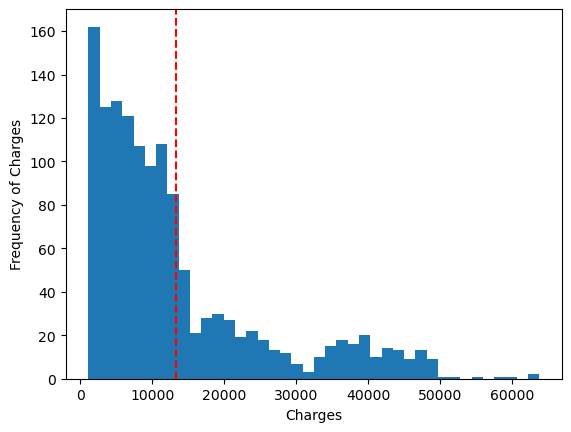

In [4]:
_ = plt.hist(medical['charges'], bins=40)
_ = plt.axvline(np.mean(medical.charges), color='red', linestyle='--')
_ = plt.xlabel('Charges')
_ = plt.ylabel('Frequency of Charges')

In [5]:
charges_mean = np.mean(medical.charges)
print(charges_mean)

13270.422265141257


In [6]:
charges_std = np.std(medical.charges)
print(charges_std)

12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ If the data is indeed randomly sampled, it should be representative of the population of all charges at the hospital. This randomness ensures that any inference or hypothesis test conducted is valid and can generalize back to the entire population of interest. Large sample sizes, by the Central Limit Theorem, mean the sampling distribution of the sample mean will be approximately normally distributed regardless of the shape of the distribution of individual charges. This is crucial for conducting hypothesis tests that assume normality of the sampling distribution. Given that the data is assumed to be randomly selected and of sufficient size, the sample can provide unbiased estimates of population parameters (like the mean) and allow for objective testing against hypothesized values. The most appropriate frequentist test would utilize the t-statistic in a one-sided t-test to determine if the charges_mean of the dataset is significantly greater than or less than the population mean.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The most appropriate type of confidence interval in this case would be a one-sided 95% confidence interval because a one-sided confidence interval is used when the direction of the interest is specified. This aligns perfectly with the administrators concern about the lower limit of the average charges. The lower bound of the confidence interval is above $12,000, so the administrator should not be too concerned.

In [7]:
sample_size = 1338
t_critical_one_sided = t.ppf(0.95, df=sample_size-1)
print(t_critical_one_sided)

1.6459941145571317


In [8]:
margin_of_error = t_critical_one_sided * (charges_std / np.sqrt(sample_size))
print(margin_of_error)

544.7314053390934


In [9]:
lower_bound = charges_mean - margin_of_error
print(lower_bound)

12725.690859802164


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ __Null Hypothesis(H0):__ The mean charges for people with insurance are equal to the mean charges for people without insurance. __Alternative Hypothesis(H1):__ The mean charges for people with insurance are different from the mean charges for people without insurance. The variances of the two groups are assumed to be equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [10]:
# Segregate the data into insured and uninsured groups
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Sample sizes
n1, n2 = len(insured), len(uninsured)
print(n1,n2)

783 555


In [11]:
# Sample means
mean1, mean2 = np.mean(insured), np.mean(uninsured)
print(mean1, mean2)

16423.928276537677 8821.421892306305


In [12]:
# Sample standard deviations
std1, std2 = np.std(insured, ddof=1), np.std(uninsured, ddof=1)
print(std1, std2)

14045.928418802127 6446.510126811736


In [13]:
# Pooled standard deviation (sp)
sp = np.sqrt(((n1-1) * std1**2 + (n2-1) * std2**2) / (n1 + n2 -2))
print(sp)

11520.034268775256


In [14]:
# T-test statistic
t_stat = (mean1 - mean2) / (sp * np.sqrt(1/n1 + 1/n2))
print(t_stat)

11.893299030876715


In [15]:
# Degrees of freedom
df = n1 + n2 -2
print(df)

1336


In [16]:
# P-value from the t-distribution
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df)) # Two-tailed test
print(p_value)

0.0


In [17]:
t_stat_scipy, p_value_scipy = ttest_ind(insured, uninsured, equal_var=True)
print(f"T-statistic (scipy): {t_stat_scipy}")
print(f"P-value (scipy): {p_value_scipy}")

T-statistic (scipy): 11.893299030876712
P-value (scipy): 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ when it comes to performing a z-test directly from a sample, scipy.stats does not include a specific function analogous to the t-tests provided. The z-test is generally used when the population variance is known or when the sample size is large (typically n > 30), under which conditions the Central Limit Theorem allows the sample mean distribution to approximate normality. In practice, knowing the population variance is rare, and when the sample size is large, the t-test is often used instead due to its practicality.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test